# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

In [174]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import seaborn as sns

# Defining parameters for plots
plt.rc('figure', figsize=(9, 5))
plt.rc('font', size=15)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [175]:
def clean_data(df):
    # Chain operations to reduce DataFrame access
    df = (df
#          .dropna(thresh=len(df) * 0.75, axis=1)  # drop columns with more than 10% missing values
          .assign(
              drivetrain=lambda df: df['drivetrain'].str.lower().str.replace('-', ' ').replace({
                  'awd': 'all wheel drive', 
                  'fwd': 'front wheel drive', 
                  'rwd': 'rear wheel drive', 
                  'four wheel drive': 'all wheel drive'
              }),  # clean drivetrain column
              model_short=lambda df: df['model'].str[:4].str.strip(' '),  # create and clean model_short column
              fuel_type=lambda df: df['fuel_type'].str.lower().replace({
                  'gas': 'gasoline', 
                  'g': 'gasoline', 
                  'gasoline fuel': 'gasoline', 
                  'premium unleaded': 'gasoline', 
                  'regular unleaded': 'gasoline',
                  'gasoline/mild electric hybrid': 'hybrid', 
                  'plug-in hybrid': 'hybrid', 
                  'plug-in electric/gas': 'electric', 
                  'hybrid fuel': 'hybrid'
              })  # clean fuel_type column
          )
    )
    return df

file_path = '../data/input/cars.csv'
cars = pd.read_csv(file_path)
cars = clean_data(cars)

In [176]:
cars.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,model_short
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,front wheel drive,gasoline,39-38,Black,...,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0,ILX
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,front wheel drive,hybrid,39-38,Gray,...,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0,ILX
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,front wheel drive,hybrid,39-38,Bellanova White Pearl,...,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0,ILX
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,front wheel drive,hybrid,39-38,Polished Metal Metallic,...,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0,ILX
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,front wheel drive,hybrid,39-38,NaN,...,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0,ILX


### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

In [177]:
cars.year.dtype

dtype('int64')

In [178]:
cars.year.value_counts().sort_index(ascending=False)

year
2024         2
2023     18218
2022     80714
2021    108894
2020    133589
         ...  
1925         2
1923         4
1919         1
1917         1
1915         2
Name: count, Length: 100, dtype: int64

### Antwoord:
De waardes in het veld `year`:
* ordinaal, continue
* zijn door pd.read_csv opgeslagen in een veld van het data type int64 en zijn dus integers
* gaan van 1915 tot 2024. Hoogstwaarschijnlijk gaat het om het productiejaar van de auto

In [179]:
cars.fuel_type.dtype

dtype('O')

In [180]:
cars.fuel_type.value_counts().sort_values(ascending=False)

fuel_type
gasoline                  644876
hybrid                     29334
diesel                     27967
e85 flex fuel              18772
electric                   16193
b                           1442
flexible fuel                493
compressed natural gas        29
unspecified                   26
diesel fuel                    5
hydrogen fuel cell             3
gaseous                        3
other                          3
electric fuel system           2
gas/electric hybrid            2
flex fuel capability           2
phev                           2
natural gas                    1
bi-fuel                        1
unknown                        1
biodiesel                      1
bio diesel                     1
premium (required)             1
automatic                      1
e85 fl                         1
premium                        1
flex fuel                      1
Name: count, dtype: int64

### Antwoord:
De waardes in het veld `fuel_type`:
* categorisch, niet-ordinaal
* zijn door pd.read_csv automatisch opgeslagen in een veld van het type object en zijn dus vermoedelijk hoofdzakelijk strings
* uitgaande van de waardes en de omschrijving van het veld en na visuele inspectie is duidelijk dat het gaat om de brandstof van de wagens

In [181]:
cars.seller_rating.dtype

dtype('float64')

In [182]:
cars.seller_rating.value_counts().sort_index(ascending=False)

seller_rating
5.0    16939
4.9    51092
4.8    64396
4.7    56343
4.6    49169
4.5    40523
4.4    30633
4.3    26375
4.2    21922
4.1    18092
4.0    16469
3.9    16280
3.8    12180
3.7    10962
3.6    11438
3.5     9476
3.4     9589
3.3    10235
3.2     6471
3.1     7641
3.0     6274
2.9     4959
2.8     6047
2.7     4761
2.6     5132
2.5     4260
2.4     4324
2.3     2944
2.2     3769
2.1     2919
2.0     1613
1.9     2934
1.8     3900
1.7     1912
1.6     1477
1.5     1360
1.4      858
1.3      879
1.2      810
1.1      184
1.0      577
Name: count, dtype: int64

### Antwoord:
De waardes in het veld `seller_rating`:
* categorisch, ordinaal
* zijn door pd.read_csv automatisch opgeslagen in een veld van het type float64 en zijn dus decimale getallen
* de waardes gaan van 1.0 tot 5.0. De inhoud bevat een score voor de verkoper op het verkoopplatform.

### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [183]:
# Determining the median price of a Volvo
cars[cars['manufacturer'] == 'Volvo']['price'].median()

36673.0

In [184]:
# Identifying the record with the median price
volvos = cars[cars['manufacturer'] == 'Volvo'].sort_values(by='price')
volvos.iloc[len(volvos) // 2]

manufacturer                               Volvo
model                              XC40 R-Design
year                                        2020
mileage                                  35989.0
engine                                   I-4 cyl
transmission           Automatic with Geartronic
drivetrain                       all wheel drive
fuel_type                               gasoline
mpg                                          NaN
exterior_color               Onyx Black Metallic
interior_color                          Charcoal
accidents_or_damage                          0.0
one_owner                                    1.0
personal_use_only                            1.0
seller_name                    Borton Volvo Cars
seller_rating                                4.0
driver_rating                                4.9
driver_reviews_num                          50.0
price_drop                                   NaN
price                                    36673.0
model_short         

### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

<Axes: ylabel='Frequency'>

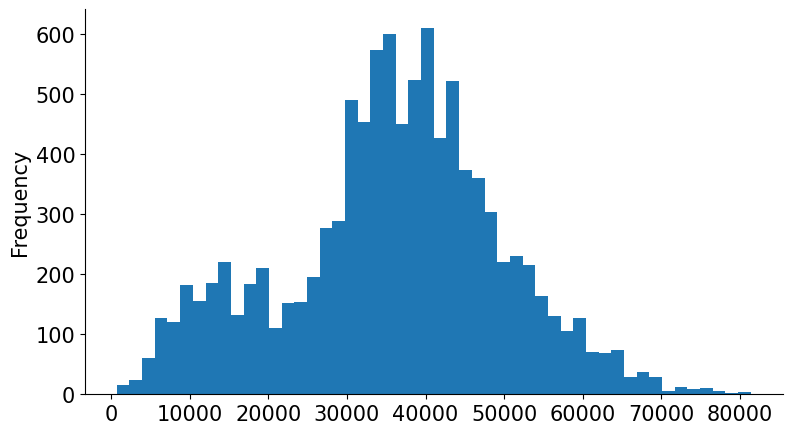

In [185]:
# Plotting a histogram chart
volvos['price'].plot(kind="hist", bins=50)

### Antwoord
Op basis van bovenstaand histogram zou ik verwachten dat zowel het gemiddelde als de mediaan net boven 35.000 zouden liggen

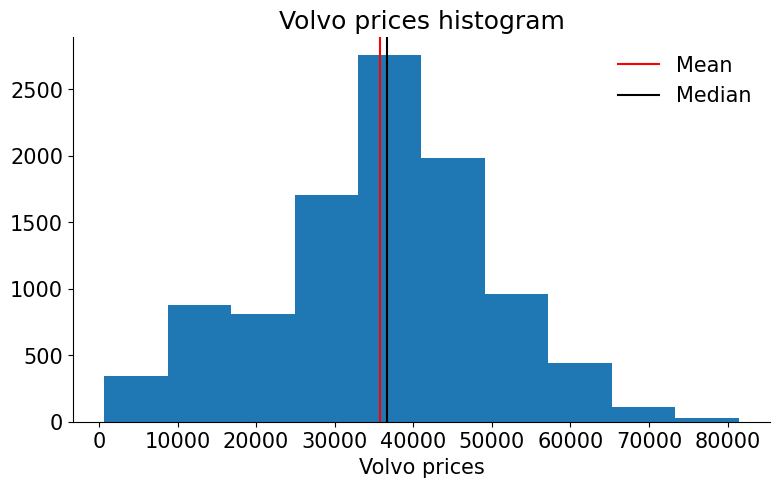

In [187]:
# Plotting a histogram chart
plt.hist(volvos['price'], bins=10)

# Plotting the mean and the median on the histogram chart
plt.axvline(x=volvos['price'].mean(), color='red', label='Mean')
plt.axvline(x=volvos['price'].median(), color='k', label='Median')

# Adding labels, title and visualizing the plot
plt.xlabel('Volvo prices')
plt.title(f'Volvo prices histogram')
plt.legend(frameon = False)
plt.show()

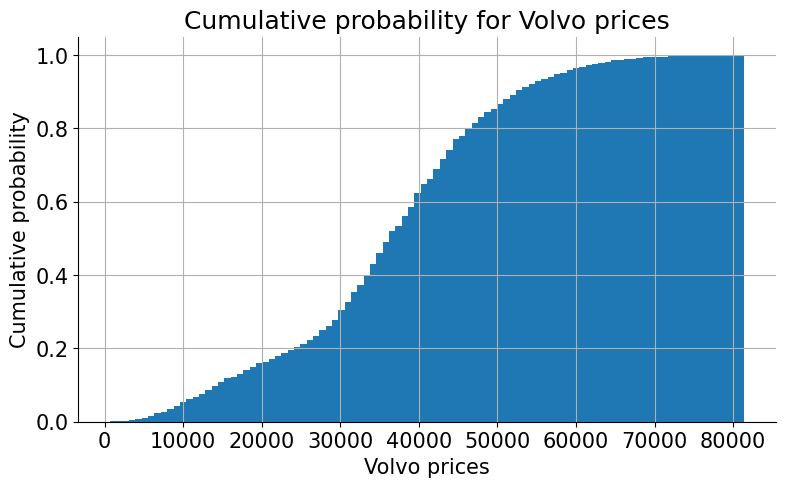

In [188]:
# Emperical Cumulative Distribution Function - calculated using a histogram + cumulative + density parameter

# Plotting the histogram of the volvo prices
plt.hist(volvos['price'], bins = 100, cumulative=True, density=True)

# Adding labels, title and visualizing the plot
plt.xlabel('Volvo prices')
plt.ylabel('Cumulative probability')
plt.title(f'Cumulative probability for Volvo prices')
plt.grid(True)
plt.show()


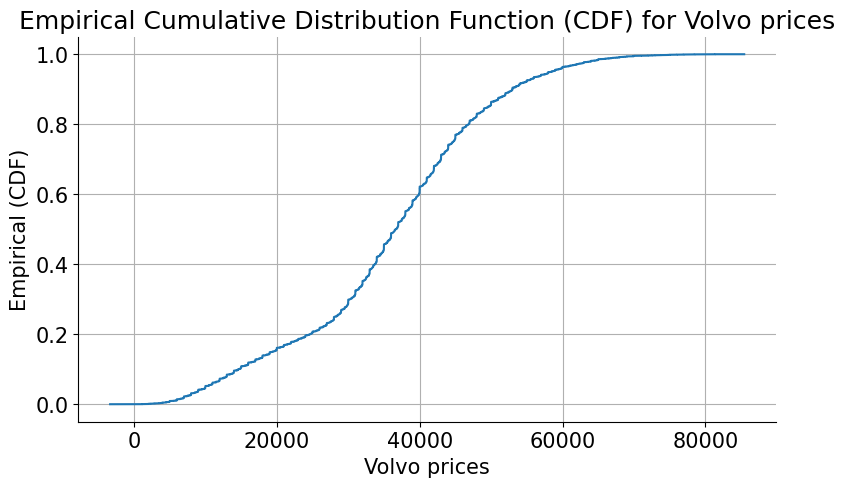

In [189]:
# Emperical Cumulative Distribution Function - calculated using SciPy's ecdf function

# Calculating and plotting the ecdf of Volvo prices
volvo_prices_ecdf = sp.stats.ecdf(volvos['price'])
ax = plt.subplot()
volvo_prices_ecdf.cdf.plot(ax)

# Adding labels, title and visualizing the plot
plt.title(f'Empirical Cumulative Distribution Function (CDF) for Volvo prices')
plt.ylabel('Empirical (CDF)')
plt.xlabel('Volvo prices')
plt.grid(True)
plt.show()

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

### Antwoord: 
Het oorspronkelijke histogram dat in de opdracht werd getoond is verbeterd door de gevisualiseerde data te normaliseren (door de density-parameter toe te voegen).

Gezien het grote verschil in het aantal records per brandstoftype, maakt dit een betere vergelijking van de prijzen mogelijk.

Onder het aangepaste histogram worden alternatieve opties voor het vergelijken van prijzen tussen Volvo's van verschillende brandstoftypes weergegeven in (1) een boxplot, (2) een violinplot en (3) een plot van de cumulatieve verdelings functies.


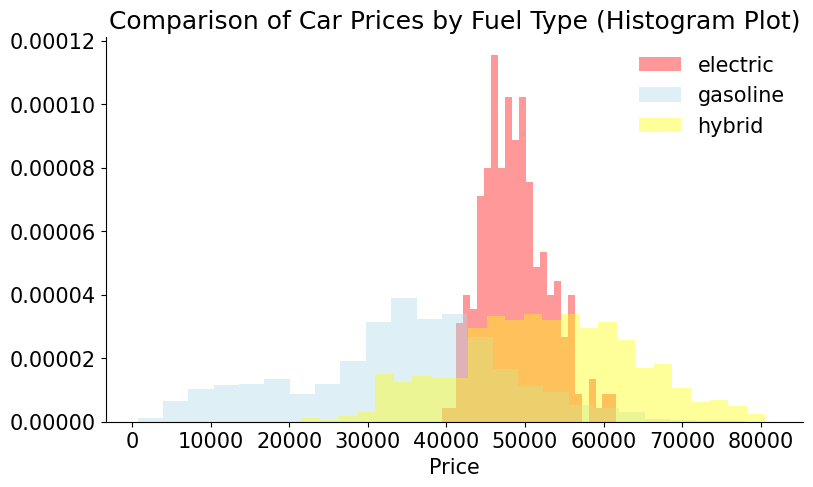

In [190]:
# Dataframe filtering obv het fuel_type
volvos_electric = volvos[volvos['fuel_type'] == 'electric']
volvos_gasoline = volvos[volvos['fuel_type'] == 'gasoline']
volvos_hybrid = volvos[volvos['fuel_type'] == 'hybrid']

# Plotting the histograms for each fuel type => Adding the density=True parameter to make a better comparison
plt.hist(volvos_electric['price'], bins=25, color='red', alpha=0.4, density=True, label='electric')
plt.hist(volvos_gasoline['price'], bins=25, color='lightblue', alpha=0.4, density=True, label='gasoline')
plt.hist(volvos_hybrid['price'], bins=25, color='yellow', alpha=0.4, density=True, label='hybrid')
plt.xlabel('Price')
plt.title('Comparison of Car Prices by Fuel Type (Histogram Plot)')
plt.legend(frameon = False)
plt.show()

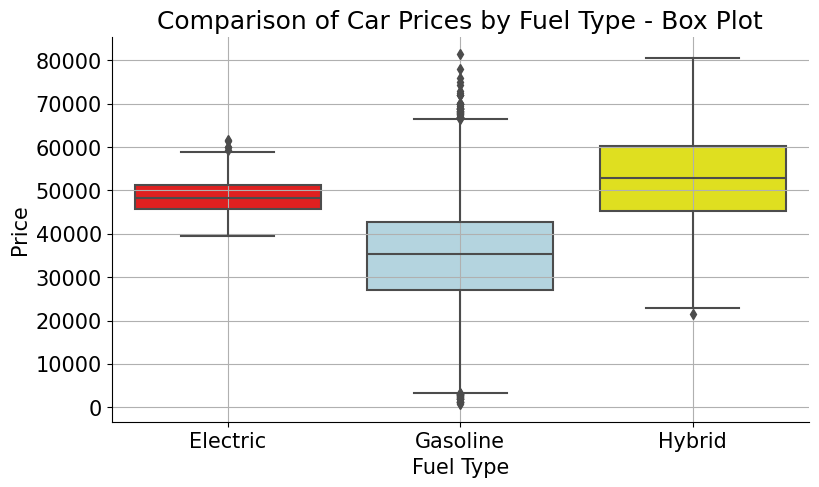

In [191]:
# Combine data into a single DataFrame
volvos_combined = pd.concat([volvos_electric.assign(Fuel_Type='Electric'),
                             volvos_gasoline.assign(Fuel_Type='Gasoline'),
                             volvos_hybrid.assign(Fuel_Type='Hybrid')])

# Creating dictionary to store colors per fuel type
my_colors = {'Electric': 'red', 'Gasoline': 'lightblue', 'Hybrid': 'yellow'}

# Creating a box plot
sns.boxplot(data=volvos_combined, x='Fuel_Type', y='price', palette=my_colors.values())
# Adding labels, title and visualizing the plot
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Comparison of Car Prices by Fuel Type - Box Plot')
plt.grid(True)
plt.show()


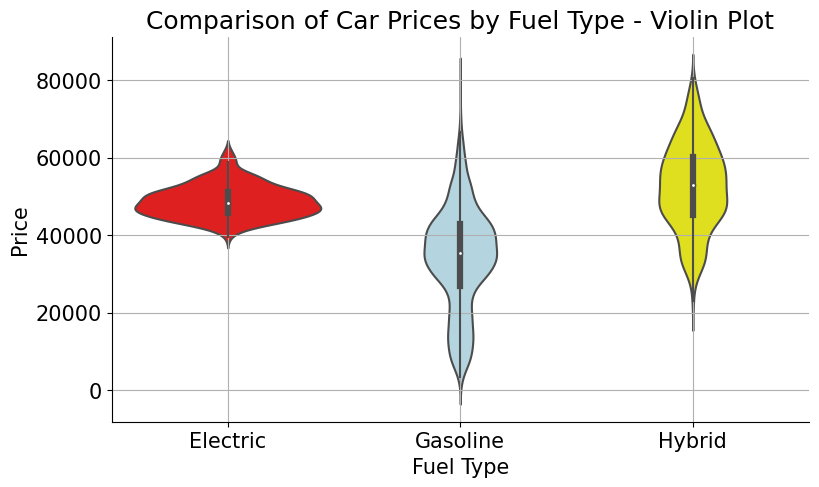

In [192]:
# Creating a violin plot
sns.violinplot(data=volvos_combined, x='Fuel_Type', y='price', palette=my_colors.values())

# Adding labels, title and visualizing the plot
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Comparison of Car Prices by Fuel Type - Violin Plot')
plt.grid(True)
plt.show()

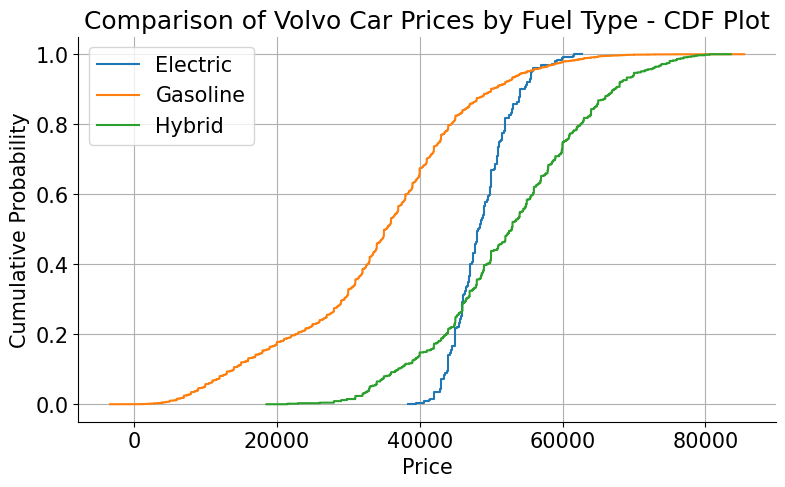

In [193]:
from statsmodels.distributions.empirical_distribution import ECDF

# Taking the prices for each fuel type
volvos_electric_prices = volvos_electric['price']
volvos_gasoline_prices = volvos_gasoline['price']
volvos_hybrid_prices = volvos_hybrid['price']

# Calculating empirical cumulative distribution functions
volvos_electric_prices_ecdf = sp.stats.ecdf(volvos_electric_prices)
volvos_gasoline_prices_ecdf = sp.stats.ecdf(volvos_gasoline_prices)
volvos_hybrid_prices_ecdf = sp.stats.ecdf(volvos_hybrid_prices)

# Plotting CDFs
ax = plt.subplot()
volvos_electric_prices_ecdf.cdf.plot(ax, label='Electric')
volvos_gasoline_prices_ecdf.cdf.plot(ax, label='Gasoline')
volvos_hybrid_prices_ecdf.cdf.plot(ax, label='Hybrid')

# Adding labels, title and visualizing the plot
plt.xlabel('Price')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of Volvo Car Prices by Fuel Type - CDF Plot')
plt.legend()
plt.grid(True)
plt.show()


### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![Image Title](statistiek_deel2_autoproductie_vraag5_boxplots.jpeg)

### Vragen + antwoorden
 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.
    
    #### Antwoord: Onwaar

    Op basis van de box plots valt door visuele inspectie duidelijk af te leiden dat de spreiding van benzinewagens veel groter is dan die van electrische wagens.

    Kwartielafstand
    De spreiding van de prijzen van bezinewagens (excl outliers) varieert van ongeveerd 27k (Q1) tot 43k (Q3) wat een verschil (IQR - interquartile range) betekent van 16k.
    Beschouwen we de box plot voor prijzen van electrische wagens, dan zien we dat die zeer geconcentreerd zitten net onder 50k, met onderste kwartiel Q1 rond de 46k en een bovenste kwartiel Q3 van 51k. Wat een IQR geeft van ongeveer 5k.
    
    Spreidingsbreedte
    We kunnen duidelijk zien dat de hele box plot van electrische wagens incl de whiskers, helemaal past in alleen al de bovenste whisker van de plot van benzinewagens.
    De spreidingsbreedte van benzinewagens (excl outliers) varieert van ongeveer 3k (min) tot ongeveer 66k (max), wat een verschil geeft van wel 63k.
    Terwijl de spriedingsbreedte van electrische wagens varieert van 40k (min) tot net geen 60k max, een afstand van slechts 20k.

    Het is dus duidelijk dat de spreding van de prijs van bezine wagens veel groter is dan die van electrische wagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.
    
    #### Antwoord: Het antwoord op deze vraag valt niet te besluiten uit de box plots. 

    Een box plot zegt iets over de spreiding van de data punten, maar het geeft geen informatie over op hoeveelheid data punten waarop een specifiek box plot gebaseerd is.
    Wanneer je 2 verschillende "types" data-punten (electrisch versus benzine) naast elkaar visualiseert in 2 box plots, dan kan je dus wel de spreiding van de verschillende "types" vergelijken, 
    maar je kan geen conslusies trekken mbt de kans dat een datapunt in het ene plot vs het andere plot valt.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.
    
    #### Antwoord: Waar
    
    Binnen eenzelfde box plot kan je wel conclusies trekken mbt de kans van een data-punt.

    Uit de boxplots blijkt dat de mediaanprijs van elektrische wagens rond de 50.000 euro ligt en dat de box en whiskers suggereren dat een aanzienlijk deel van de elektrische wagens boven de 50.000 euro geprijsd is. Voor benzinewagens ligt de mediaan echter duidelijk onder de 50.000 euro, wat aangeeft dat minder dan de helft van de benzinewagens boven de 50.000 euro geprijsd is.

### Bijkomende berekeningen ter ondersteuning van de antwoorden op vraag 5 (out of scope - dient niet mee te worden ingediend als antwoord op de examenvraag)

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

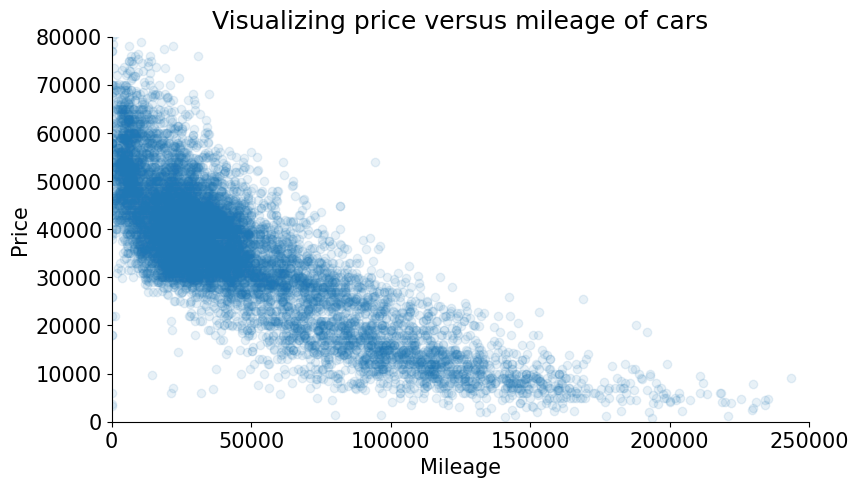

In [197]:
# Min & max values for the miles of the cars
mileage_min = 0
mileage_max = 250000

# Min & max values for the price of the cars
price_min = 0
price_max = 80000

# Filter out Volvos and exclude the volvo with +1.000.000 miles
volvos = cars[((cars['manufacturer'] == 'Volvo') & (cars['mileage'] < 1000000))]

# Creating a scatterplot to visualize the relation between price & mileage
plt.scatter(x=volvos['mileage'], y=volvos['price'], alpha=0.1)
plt.xlim(mileage_min, mileage_max)
plt.ylim(price_min, price_max)
plt.title('Visualizing price versus mileage of cars')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


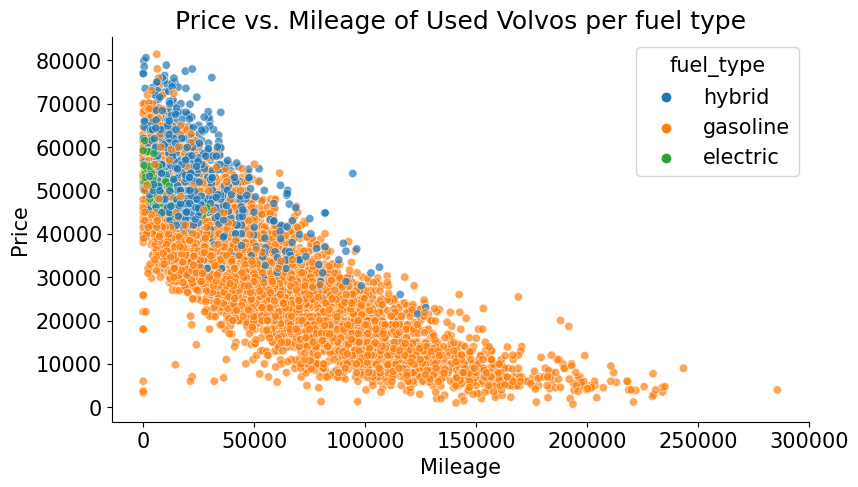

In [196]:
# Price vs. Mileage of Used Volvos per fuel type, excluding the volvo with mileage over 1 000 000
fig, ax = plt.subplots()

volvos = cars[((cars['manufacturer'] == 'Volvo') & (cars['mileage'] < 1000000))]
sns.scatterplot(x='mileage', y='price', alpha = 0.7, hue='fuel_type', data=volvos, ax = ax)

plt.title('Price vs. Mileage of Used Volvos per fuel type')
plt.xlabel('Mileage')
plt.ylabel('Price');

### Optioneel - modeleren lineare regressie

Mean Squared Error: 264802747.23182806
R-squared: 0.20694764897563267


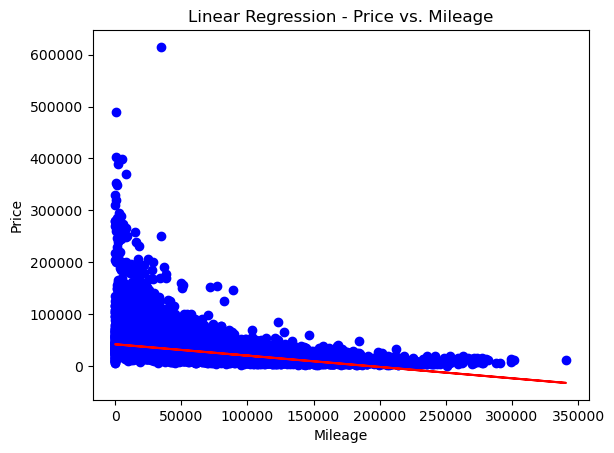

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have a DataFrame named 'cars' with columns 'mileage' and 'price'

new_cars = cars.dropna()

# Step 2: Prepare Data
X = new_cars['mileage'].values.reshape(-1, 1)  # Features (mileage)
y = new_cars['price'].values  # Target variable (price)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optionally, you can visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Linear Regression - Price vs. Mileage')
plt.show()


### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

In [64]:
# Calculating mean price of electric volvo
cars[(cars['manufacturer'] == 'Volvo') & (cars['fuel_type'] == 'Electric')].price.mean()

48788.391304347824

### Antwoord:

Om de betrouwbaarheid van de schatting te evaluren kunnen we de bootstrapping methode gebruiken door herhaaldelijk steekproeven te trekken uit de dataset, waarbij elke keer opnieuw het gemiddelde van de prijs van tweedehands electrische volvo's wordt berekend.

Betrouwbaarheidsinterval voor het gemiddelde van de prijzen: [48337.49685039 49183.3253937 ]


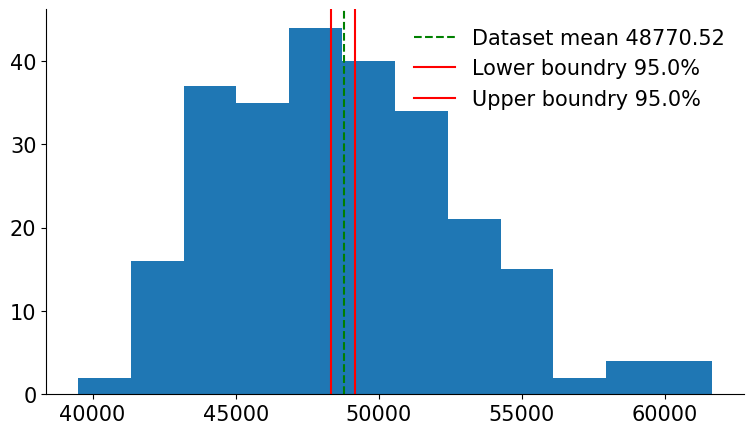

In [244]:
# Bootstrapping
# List with number of second hand volvos
volvo_elec_prices_lst = list(volvos_electric.price)

# Defining the number of bootstrap samples & accuracy
num_bootstraps = 1000
accuracy = 0.95
acc_min = round((1 - accuracy), 2)
acc_max = accuracy

# Declaring empty list to store estimated average prices
bootstrapped_means = []

# Perform boostrapping
for _ in range(num_bootstraps):
    # Draw sample wioth replacement out of original dataset
    bootstrap_sample = np.random.choice(volvo_elec_prices_lst, size=len(volvo_elec_prices_lst), replace=True)
    # Calculating mean of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    # Adding mean to the list of means
    bootstrapped_means.append(bootstrap_mean)

# Calculating confidence interval for the bootrapped means
confidence_interval = np.percentile(bootstrapped_means, [acc_min * 100, acc_max * 100])

# Printing the confidence interval
print("Betrouwbaarheidsinterval voor het gemiddelde van de prijzen:", confidence_interval)

# Plotting actual prices with bootstrap mean calculations
plt.hist(volvo_elec_prices_lst, bins=12)
plt.axvline(np.mean(volvo_elec_prices_lst), color='green', linestyle='--', label=f'Dataset mean {np.mean(volvo_elec_prices_lst):.2f}')
plt.axvline(confidence_interval[0], color='red', label=f'Lower boundry {accuracy * 100}%')
plt.axvline(confidence_interval[1], color='red', label=f'Upper boundry {accuracy * 100}%')
plt.legend(frameon = False)
plt.show()